In [15]:
import cv2,os

data_path='Dataset/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary


In [16]:
img_size=100
data=[]
labels=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        imgs=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(imgs,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            labels.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)

In [12]:
import numpy as np
from tensorflow import keras
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [5]:
np.save('data',data)
np.save('target',new_target)

In [6]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [32]:
checkpoint = ModelCheckpoint('my_model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/20
30/30 [==============================] - 43s 1s/step - loss: 0.9079 - accuracy: 0.5070 - val_loss: 0.6575 - val_accuracy: 0.6498
INFO:tensorflow:Assets written to: my_model-001.model\assets
Epoch 2/20
30/30 [==============================] - 43s 1s/step - loss: 0.6175 - accuracy: 0.6704 - val_loss: 0.4707 - val_accuracy: 0.8481
INFO:tensorflow:Assets written to: my_model-002.model\assets
Epoch 3/20
30/30 [==============================] - 49s 2s/step - loss: 0.4426 - accuracy: 0.8203 - val_loss: 0.3377 - val_accuracy: 0.9198
INFO:tensorflow:Assets written to: my_model-003.model\assets
Epoch 4/20
30/30 [==============================] - 52s 2s/step - loss: 0.3363 - accuracy: 0.8768 - val_loss: 0.2666 - val_accuracy: 0.9114
INFO:tensorflow:Assets written to: my_model-004.model\assets
Epoch 5/20
30/30 [==============================] - 52s 2s/step - loss: 0.2726 - accuracy: 0.8851 - val_loss: 0.2598 - val_accuracy: 0.9030
INFO:tensorflow:Assets written to: my_model-005.model\as

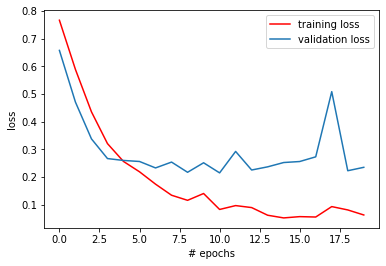

In [33]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

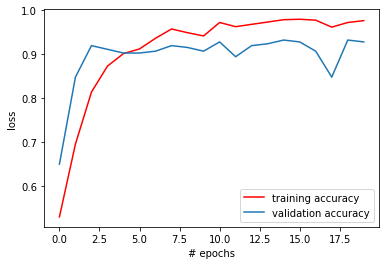

In [35]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [36]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 341ms/step - loss: 0.1036 - accuracy: 0.9621
[0.10364756733179092, 0.9621211886405945]


In [9]:
from keras.models import load_model
import cv2
import numpy as np


In [10]:
from keras.models import load_model
model = load_model('my_model-011.h5')

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 
source=cv2.VideoCapture(2)

labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [15]:
import cv2

path =  "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)

img = np.zeros((500,500))

text = "Some text in a box"

(text_width,text_height) = cv2.getTextSize(text , font, fontScale = font_scale , thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] -25

box_coords = ((text_offset_x,text_offset_y),(text_offset_x + text_width + 2 , text_offset_y - text_height -2))
cv2.rectangle(img , box_coords[0] , box_coords[1], rectangle_bgr , cv2.FILLED)
cv2.putText(img , text ,(text_offset_x,text_offset_y),font , fontScale=font_scale,color=(0,0,0), thickness=1 )


from imutils.video import VideoStream
vs = VideoStream(src=0).start()

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOEerror("cannot open webcam")
    

while True:
    imgs = vs.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 
    gray = cv2.cvtColor(imgs,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_Color = imgs[y:y+h,x:x+w]
        cv2.rectangle(imgs ,(x,y),(x+w,y+h) ,(255,0,0), 2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if(len(faces) ==0):
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in faces:
                face_roi = roi_Color[ey: ey+eh ,ex:ex + ew]
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0) #need 4th dimens
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = model.predict(final_image)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(Predictions>0):
        status = "No Mask"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(imgs ,(x1,y1),(x1+w,y1+h) ,(0,0,0), -1)
        
        cv2.putText(imgs,status,(x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2 )
        cv2.putText(imgs,status, (100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(imgs,(x,y),(x+w,y+h),(0,0,255) )
    else:
        status = "Face Mask"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(imgs ,(x1,y1),(x1+w,y1+h) ,(0,0,0), -1)
        
        cv2.putText(imgs,status,(x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2 )
        cv2.putText(imgs,status, (100,150),font, 3,(0,255,0),2,cv2.LINE_4)
        
        cv2.rectangle(imgs,(x,y),(x+w,y+h),(0,255,0) )
        
    cv2.imshow("face mask project",imgs)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not d

In [12]:
from imutils.video import VideoStream
vs = VideoStream(src=0).start()


while(True):

    img = vs.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()


ValueError: in user code:

    C:\Users\sirepandey\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\sirepandey\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\sirepandey\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\sirepandey\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\sirepandey\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\sirepandey\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\sirepandey\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\sirepandey\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\sirepandey\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 224, 224, 3), found shape=(None, 100, 100, 1)


In [27]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from imutils.video import VideoStream
vs = VideoStream(src=0).start()
    

model = load_model("my_model_10.h5")
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml") 
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret,frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    faces_list=[]
    preds=[]
    for (x, y, w, h) in faces:
        face_frame = frame[y:y+h,x:x+w]
        face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (224, 224))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame =  preprocess_input(face_frame)
        faces_list.append(face_frame)
        if len(faces_list)>0:
            preds = model.predict(faces_list)
        for pred in preds:
            (mask, withoutMask) = pred
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        cv2.putText(frame, label, (x, y- 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
 
        cv2.rectangle(frame, (x, y), (x + w, y + h),color, 2)
        # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

SystemError: <class 'cv2.CascadeClassifier'> returned a result with an error set

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [22]:
imagePaths = list(paths.list_images("Dataset"))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000027FFADE1810>

In [23]:
print(len(data))
print(len(labels))

630
630


In [17]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_shape=(224, 224, 3))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False


9412608/9406464 [==============================] - 8s 1us/step


In [24]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [25]:
INIT_LR = 1e-4
EPOCHS = 1
BS = 32
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...


ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (224, 224, 3), y.shape = (504, 1)